In [3]:
from WF_SDK import device, logic, pattern   # import instruments
import matplotlib.pyplot as plt   # needed for plotting

In [4]:
# connect to the device
device_data = device.open()

In [5]:
# initialize the logic analyzer with default settings
logic.open(device_data)

In [6]:
# generate a 100KHz PWM signal with 30% duty cycle on DIO0
pattern.generate(device_data, channel=0, function=pattern.function.pulse, frequency=100e03, duty_cycle=30)

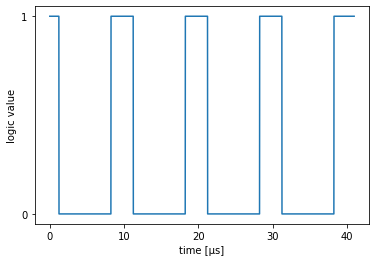

In [7]:
# record a logic signal on DIO0
buffer, time = logic.record(device_data, channel=0)
 
# plot
time = [moment * 1e06 for moment in time]   # convert time to μs
plt.plot(time, buffer)
plt.xlabel("time [μs]")
plt.ylabel("logic value")
plt.yticks([0, 1])
plt.show()
 
# reset the logic analyzer
logic.close(device_data)
 
# reset the pattern generator
pattern.close(device_data)